# Read Dataset<a href="#Read-Dataset" class="anchor-link">¶</a>

In \[4\]:

    import pandas as pd
    A = pd.read_csv("Desktop/Vaibhav/Datasets/digitsnpixels.csv")

In \[5\]:

    A.head(3)

Out\[5\]:

|     | label | pixel0 | pixel1 | pixel2 | pixel3 | pixel4 | pixel5 | pixel6 | pixel7 | pixel8 | ... | pixel774 | pixel775 | pixel776 | pixel777 | pixel778 | pixel779 | pixel780 | pixel781 | pixel782 | pixel783 |
|-----|-------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-----|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| 0   | 1     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | ... | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        |
| 1   | 0     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | ... | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        |
| 2   | 1     | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | 0      | ... | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        | 0        |

3 rows × 785 columns

# Plot an image<a href="#Plot-an-image" class="anchor-link">¶</a>

In \[13\]:

    import matplotlib.pyplot as plt
    plt.imshow(A[9:10].drop(labels=['label'],axis=1).values.reshape(28,28))

Out\[13\]:

    <matplotlib.image.AxesImage at 0x1203bec18>

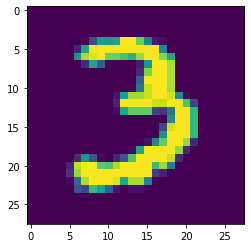

# X and Y<a href="#X-and-Y" class="anchor-link">¶</a>

In \[48\]:

    Y = A["label"].values
    Ynew = pd.get_dummies(Y).values

In \[65\]:

    Xnew = A.drop(labels=['label'],axis=1).values/255

In \[66\]:

    xtrain.shape

Out\[66\]:

    (33600, 784)

# Training and testing set<a href="#Training-and-testing-set" class="anchor-link">¶</a>

In \[67\]:

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)
    xtrain = xtrain.reshape(33600,28,28,1)
    xtest = xtest.reshape(8400,28,28,1)

# Create a CNN<a href="#Create-a-CNN" class="anchor-link">¶</a>

In \[68\]:

    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Convolution2D,MaxPooling2D,Flatten, BatchNormalization

In \[69\]:

    nn = Sequential()

    nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
    nn.add(MaxPooling2D(pool_size=(2,2)))
    nn.add(BatchNormalization())
    nn.add(Dropout(0.2))
    nn.add(Flatten())
    nn.add(Dense(120,activation="relu"))
    nn.add(Dense(10,activation="softmax"))

In \[71\]:

    nn.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")
    nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)

    Epoch 1/3
    1050/1050 [==============================] - 19s 18ms/step - loss: 0.0705 - accuracy: 0.9776 - val_loss: 0.0713 - val_accuracy: 0.9814
    Epoch 2/3
    1050/1050 [==============================] - 18s 17ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0655 - val_accuracy: 0.9840
    Epoch 3/3
    1050/1050 [==============================] - 19s 18ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0810 - val_accuracy: 0.9789

Out\[71\]:

    <tensorflow.python.keras.callbacks.History at 0x23ed6aeb8>

In \[73\]:

    xtrain.shape

Out\[73\]:

    (33600, 28, 28, 1)

In \[82\]:

    plt.imshow(A[193:194].drop(labels=['label'],axis=1).values.reshape(28,28))

Out\[82\]:

    <matplotlib.image.AxesImage at 0x24a362cf8>

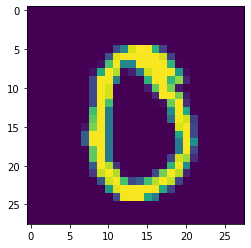

In \[84\]:

    nn.predict(A[193:194].drop(labels=['label'],axis=1).values.reshape(1,28,28,1))

Out\[84\]:

    array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In \[85\]:

    X.shape

Out\[85\]:

    (42000, 784)

In \[86\]:

    xtrain.shape

Out\[86\]:

    (33600, 28, 28, 1)

In \[ \]: